<a href="https://colab.research.google.com/github/lisosoma/BI_ALGO/blob/main/hw7/NGS_HW7_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install conda and add channels to look for packages in
import sys
! wget https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
! chmod +x Anaconda3-2020.02-Linux-x86_64.sh
! bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda update -n base -c defaults conda -y
! conda config --add channels bioconda
! conda config --add channels conda-forge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!conda install -c bioconda hisat2
!conda install bcbio-gff
!conda install -c bioconda pysam
!conda install -c bioconda samtools
!conda install -c bioconda bowtie2
!conda install -c bioconda spades

In [ ]:
!pip install pysam

**1. Выравнивание ридов RNA-Seq**

Приложить риды RNA-Seq на геном (можно с использованием базы генов) с помощью программ HISAT2 или STAR (на выбор).


Установим HISAT2 для выравнивания РНК-ридов.

In [ ]:
!gunzip /content/drive/MyDrive/hw7/SRR453566_1.fastq.gz
!gunzip /content/drive/MyDrive/hw7/SRR453566_2.fastq.gz

In [ ]:
!hisat2-build /content/drive/MyDrive/hw7/ref.fa genome_index.ht2

Выровняем риды.

In [ ]:
!hisat2 -x genome_index.ht2 -1 /content/drive/MyDrive/hw7/SRR453566_1.fastq -2 /content/drive/MyDrive/hw7/SRR453566_2.fastq -S out.sam 

5725730 reads; of these:
  5725730 (100.00%) were paired; of these:
    1190825 (20.80%) aligned concordantly 0 times
    4291355 (74.95%) aligned concordantly exactly 1 time
    243550 (4.25%) aligned concordantly >1 times
    ----
    1190825 pairs aligned concordantly 0 times; of these:
      136484 (11.46%) aligned discordantly 1 time
    ----
    1054341 pairs aligned 0 times concordantly or discordantly; of these:
      2108682 mates make up the pairs; of these:
        1419213 (67.30%) aligned 0 times
        637765 (30.24%) aligned exactly 1 time
        51704 (2.45%) aligned >1 times
87.61% overall alignment rate


**2. Оценка количества экспрессирующихся генов**

По полученному SAM файлу и базе генов оценить процент экспрессирующихся генов. Какая часть гена должна быть покрыта и какая глубина должна быть чтобы он считался таковым, решите сами. Можно взять, к примеру, 95%. Глубину (экспрессию) лучше всего мерять в величинах FPKM или TPM.


In [ ]:
!samtools view -S -b  out.sam > out.bam
!samtools sort --threads 4 out.bam > out.sorted.bam
!samtools index out.sorted.bam out.sorted.bai
!faidx ref.fa -i chromsizes | sort > sizes.genome

In [ ]:
!cat sizes.genome 

I	230218
II	813184
III	316620
IV	1531933
IX	439888
Mito	85779
V	576874
VI	270161
VII	1090940
VIII	562643
X	745751
XI	666816
XII	1078177
XIII	924431
XIV	784333
XV	1091291
XVI	948066


In [ ]:
!cat /content/drive/MyDrive/hw7/genes.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$3 ~ "exon"' > exons.gff

In [ ]:
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "I" {print $4,$5}' > I.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "II" {print $4,$5}' > II.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "III" {print $4,$5}' > III.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "IV" {print $4,$5}' > IV.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "V" {print $4,$5}' > V.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "VI"{print $4,$5}' > VI.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "VII" {print $4,$5}' > VII.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "VIII" {print $4,$5}' > VIII.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "IX" {print $4,$5}' > IX.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "X" {print $4,$5}' > X.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "XI" {print $4,$5}' > XI.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "XII"{print $4,$5}' > XII.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "XIII" {print $4,$5}' > XIII.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "XIV"{print $4,$5}' > XIV.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "XV" {print $4,$5}' > XV.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "XVI"{print $4,$5}' > XVI.txt
!cat exons.gff | grep -v '^#' | awk -v FS="\t" -v OFS="\t" '$1 == "Mito"{print $4,$5}' > Mito.txt

In [ ]:
import numpy as np

chromosomes = {'I' : 230218,
               'II' : 813184,
               'III' : 316620,
               'IV' : 1531933,
               'V' : 576874,
               'VI' : 270161,
               'VII' : 1090940,
               'VIII' : 562643,
               'IX' : 439888,
               'X' : 745751,
               'XI' : 666816,
               'XII' : 1078177,
               'XIII' : 924431,
               'XIV' : 784333,
               'XV' : 1091291,
               'XVI' : 948066,
               'Mito' : 85779}

lengths = list(chromosomes.values())
names = list(chromosomes.keys())
cumlen = np.cumsum(lengths)

In [ ]:
align = ps.AlignmentFile('/content/drive/MyDrive/hw7/out.sorted.bam', 'rb')
# занесем в словарь позиции ридов
# для каждой хромосомы
reads = {'I' : [], 'II' : [], 'III' : [], 'IV' : [],
        'V' : [], 'VI' : [], 'VII' : [], 'VIII' : [],
        'IX' : [], 'X' : [], 'XI' : [], 'XII' : [],
        'XIII' : [], 'XIV' : [], 'XV' : [],
        'XVI' : [], 'Mito' : []}

for read in tqdm(align.fetch()):
    start, end = read.reference_start, read.reference_end
    if start and end:
        reads[f'{read.reference_name}'].append([start, end])

names = list(reads.keys())

pp = []
# занесем в список pp 
# позиции всех экзонов
# для каждой хромомсомы
for n in names:
    with open(f'/content/drive/MyDrive/hw7/{n}.txt', 'r') as f:
            chrom = f.read().splitlines()
    p = []
    for c in chrom:
        p.append(list(map(int, c.split('\t'))))
    pp.append(p)

In [ ]:
import pysam as ps
from tqdm import tqdm

def coverage(sam):

    # список с покрытиями для каждой хромосомы 
    covs = [np.zeros(l) for l in lengths]
    
    for i in range(17):
        for r in tqdm(reads[names[i]]):
            start, end = r[0], r[1]
            covs[i][start:end] += 1
    return covs

In [ ]:
covs = coverage('/content/drive/MyDrive/hw7/out.sorted.bam')

In [ ]:
covs = np.array(covs)
means = []
for i in range(17):
    p = pp[i]
    cov = covs[i]
    mean = []
    for k in p:
        mean.append(np.mean(cov[k[0]:k[1]]))
    means.append(mean)

In [ ]:
number_of_reads = 12514262
per_million_scaling_factor = number_of_reads / 10 ** 6

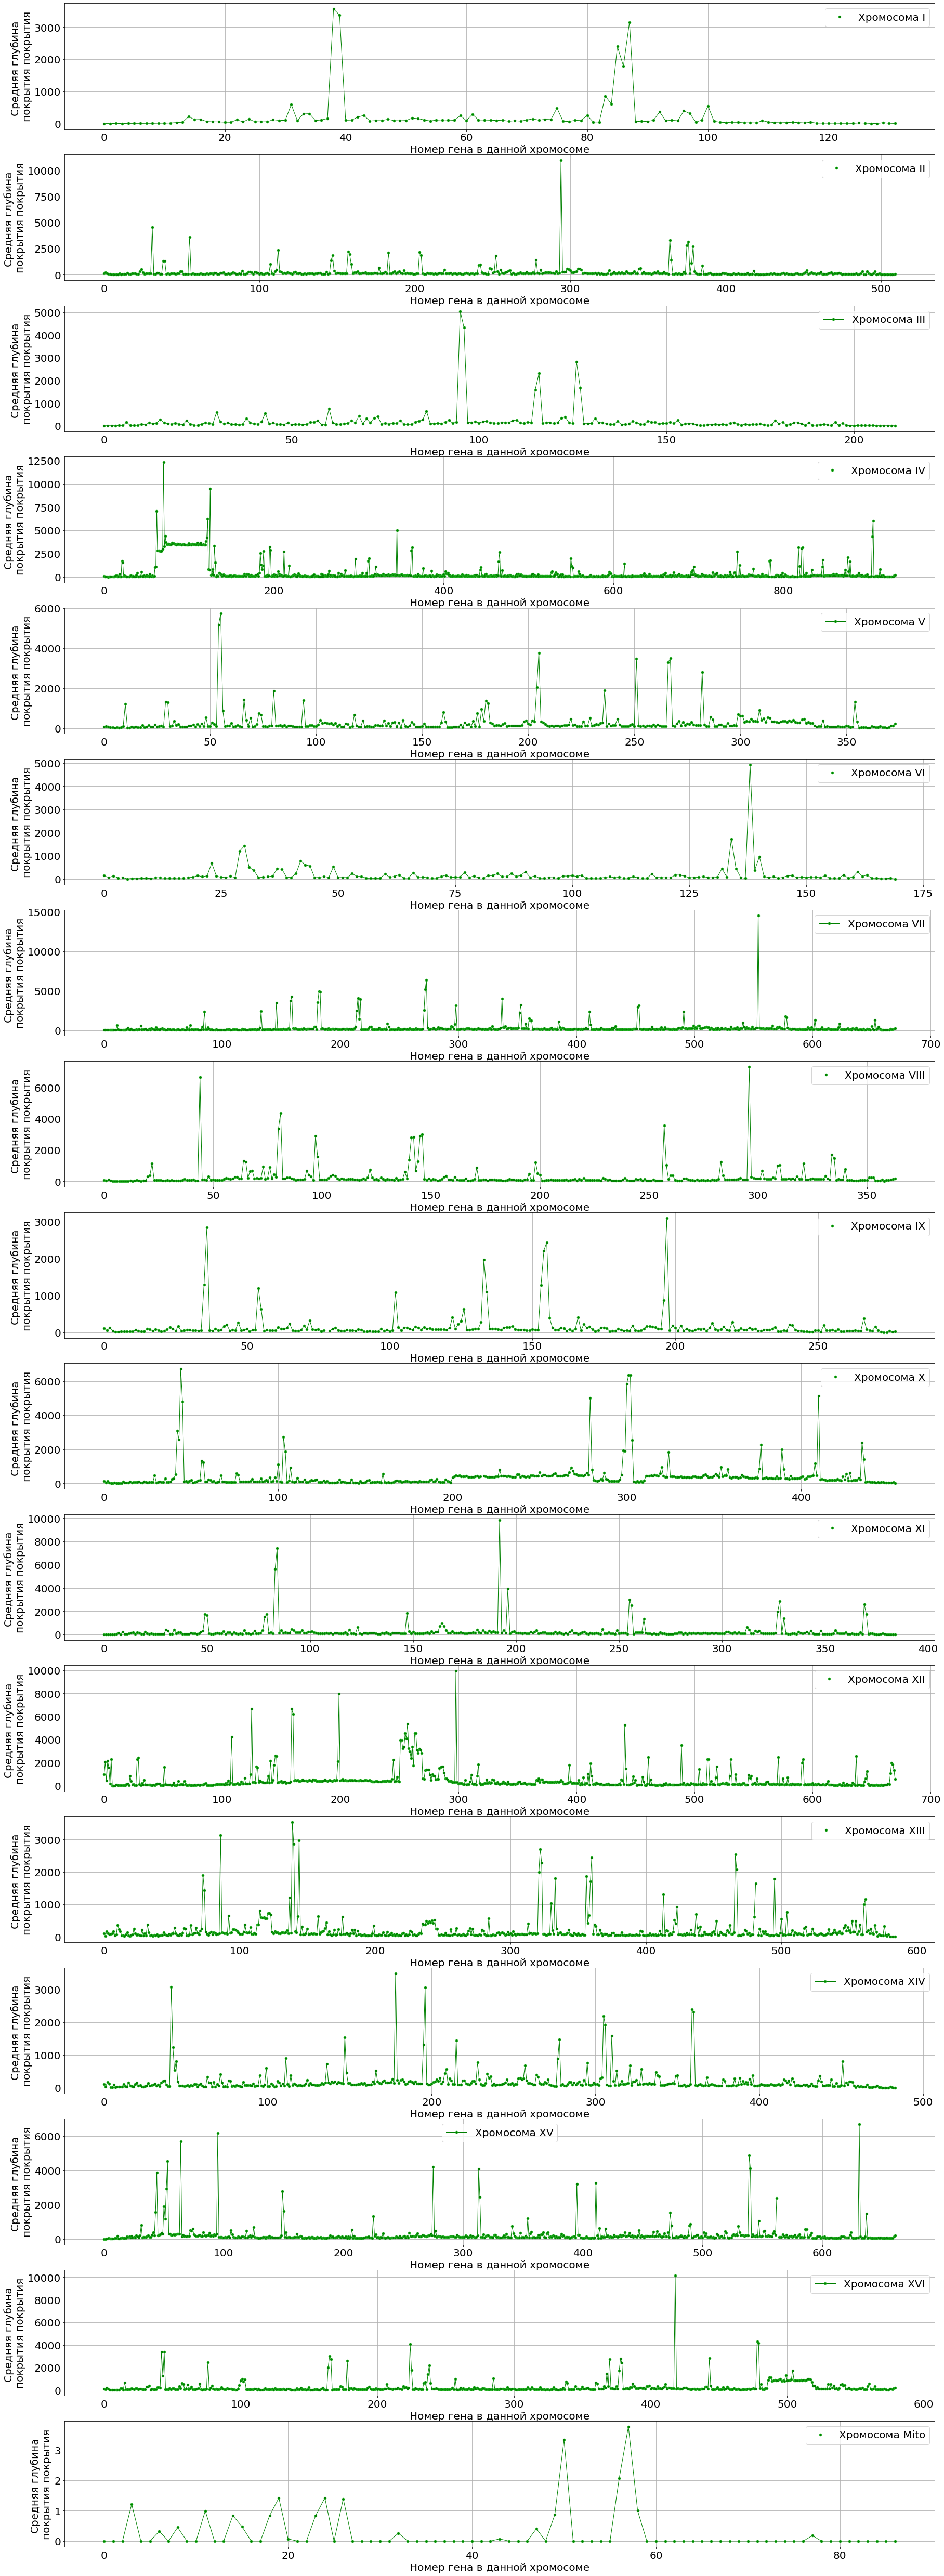

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(17, figsize=(30, 90))

for i in range(17):
    Ax = ax[i]
    Ax.plot(means[i], label=f'Хромосома {names[i]}', 
            color='green', linewidth = 1, marker = 'o', 
            markersize = 5, markerfacecolor = 'green',
            markeredgecolor = 'limegreen', markeredgewidth = 0.5)
    
    Ax.set_xlabel('Номер гена в данной хромосоме', fontsize=20)
    Ax.set_ylabel('Средняя глубина \nпокрытия покрытия', fontsize=20)
    plt.rcParams.update({'font.size': 20})
    Ax.legend()
    Ax.grid()

In [ ]:
TPKM = []
for i in range(17):
    p = pp[i]
    cov = covs[i]
    tpk = []
    for k in p:
        tpk.append(np.sum(cov[k[0]:k[1]]) / (k[1] - k[0]) / 1000 / per_million_scaling_factor)
    TPKM.append(tpk)

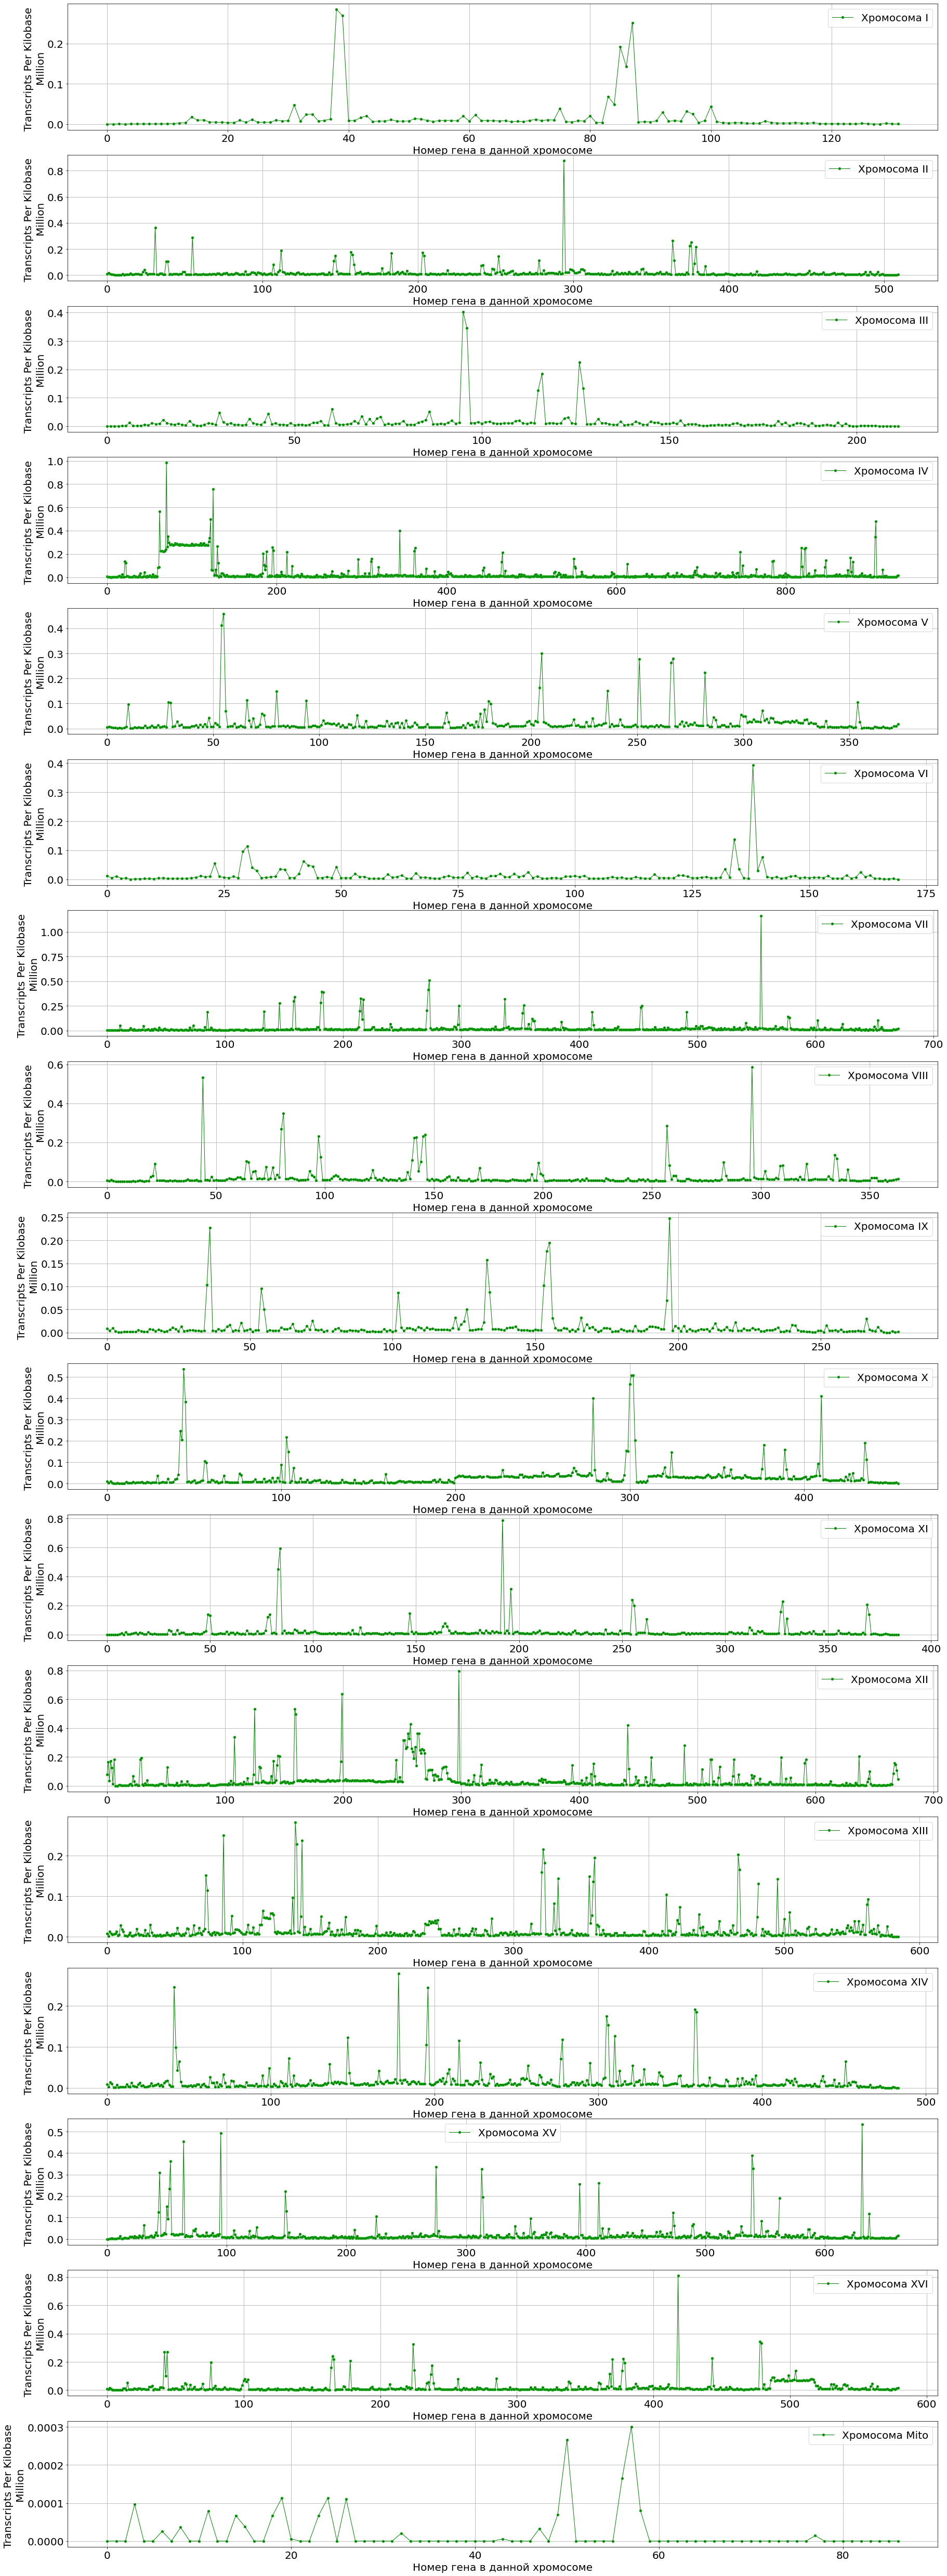

In [ ]:
fig, ax = plt.subplots(17, figsize=(30, 90))

for i in range(17):
    Ax = ax[i]
    Ax.plot(TPKM[i], label=f'Хромосома {names[i]}', 
            color='green', linewidth = 1, marker = 'o', 
            markersize = 5, markerfacecolor = 'green',
            markeredgecolor = 'limegreen', markeredgewidth = 0.5)
    
    Ax.set_xlabel('Номер гена в данной хромосоме', fontsize=20)
    Ax.set_ylabel('Transcripts Per Kilobase \nMillion', fontsize=20)
    plt.rcParams.update({'font.size': 20})
    Ax.legend()
    Ax.grid()

Посчитаем количество генов с покрытием 95% и TPKM > 0.01.

In [ ]:
with open("covs.txt", "w") as file:
    print(*covs, file=file)
!cp covs.txt /content/drive/MyDrive/hw7

In [ ]:
!wget https://sourceforge.net/projects/subread/files/subread-2.0.3/subread-2.0.3-Linux-x86_64.tar.gz
!gunzip subread-2.0.3-Linux-x86_64.tar.gz
!tar  -xvf subread-2.0.3-Linux-x86_64.tar

In [ ]:
!/content/subread-2.0.3-Linux-x86_64/bin/featureCounts -g gene_id -a /content/drive/MyDrive/hw7/genes.gtf -o counts.txt -p --countReadPairs *.sam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 SAM file                                       ||
||                                                                            ||
||                           out.sam                                          ||
||                                                                            ||
||             Output file : counts.txt                          

In [ ]:
!cat counts.txt.summary

Status	out.sam
Assigned	4647213
Unassigned_Unmapped	400120
Unassigned_Read_Type	0
Unassigned_Singleton	0
Unassigned_MappingQuality	0
Unassigned_Chimera	0
Unassigned_FragmentLength	0
Unassigned_Duplicate	0
Unassigned_MultiMapping	860762
Unassigned_Secondary	0
Unassigned_NonSplit	0
Unassigned_NoFeatures	132432
Unassigned_Overlapping_Length	0
Unassigned_Ambiguity	256267


**3. Сборка de novo**

Соберите риды с нуля любым RNA-Seq сборщиком (например Trinity или rnaSPAdes), запустите на полученных контигах rnaQUAST или самостоятельно оцените количество собранных генов. Сравните количество покрытых генов с результатом, полученным в пункте 2.


In [ ]:
!spades.py --rna \
          -t 16 \
          -m 32 \
          -1 /content/drive/MyDrive/hw7/SRR453566_1.fastq -2 /content/drive/MyDrive/hw7/SRR453566_2.fastq \
          -o rna_assembly

In [ ]:
import shutil
shutil.make_archive('datarna', 'zip', '/content/rna_assembly')
!cp datarna.zip "drive/My Drive/hw7"

In [ ]:
!unzip /content/drive/MyDrive/hw7/datarna.zip -d datarna

In [ ]:
!wget https://github.com/ablab/rnaquast/releases/download/v.2.2.2/rnaQUAST-2.2.2.tar.gz

In [ ]:
!gunzip rnaQUAST-2.2.2.tar.gz

In [ ]:
!tar -xvf rnaQUAST-2.2.2.tar

In [ ]:
!pip install gffutils

In [ ]:
!wget https://launchpad.net/ubuntu/+archive/primary/+sourcefiles/gmap/2015-12-31.v7-1/gmap_2015-12-31.v7.orig.tar.gz

In [ ]:
!gunzip /content/gmap_2015-12-31.v7.orig.tar.gz
!tar -xvf /content/gmap_2015-12-31.v7.orig.tar
!cd /content/rnaQUAST-2.2.2/gmap-2015-12-31/

In [ ]:
!python rnaQUAST-2.2.2/rnaQUAST.py \
--transcripts /content/datarna/transcripts.fasta \
--reference /content/drive/MyDrive/hw7/ref.fa --gtf /content/drive/MyDrive/hw7/genes.gtf

In [ ]:
!cat /content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/short_report.txt

SHORT SUMMARY REPORT 

METRICS/TRANSCRIPTS                                    transcripts              

 == DATABASE METRICS == 
Genes                                                  7126                     
Avg. number of exons per isoform                       1.06

 == BASIC TRANSCRIPTS METRICS == 
Transcripts                                            6512                     
Transcripts > 500 bp                                   4448                     
Transcripts > 1000 bp                                  3641

 == ALIGNMENT METRICS == 
Aligned                                                5931                     
Uniquely aligned                                       5749                     
Multiply aligned                                       53                       
Unaligned                                              581

 == ALIGNMENT METRICS FOR NON-MISASSEMBLED TRANSCRIPTS == 
Avg. aligned fraction                                  0.988                    
Av

In [ ]:
from IPython.display import Image

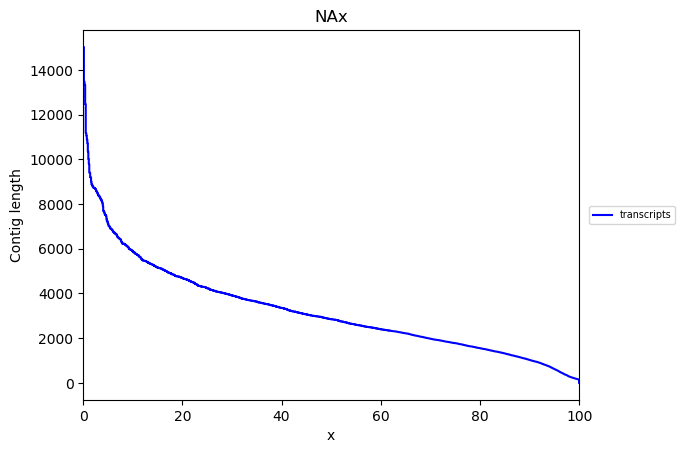

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/NAx.png")

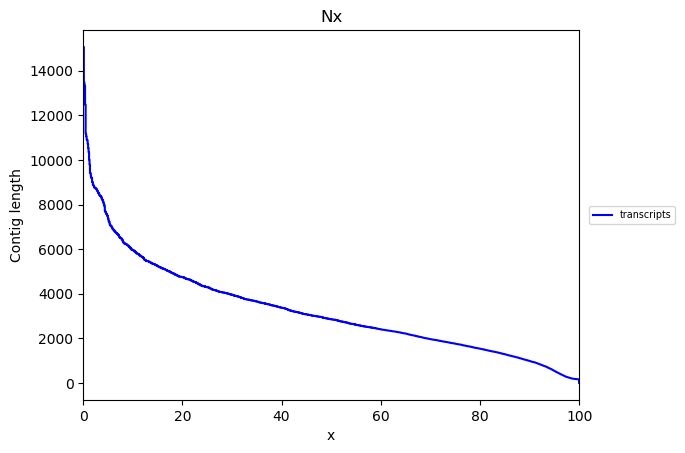

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/Nx.png")

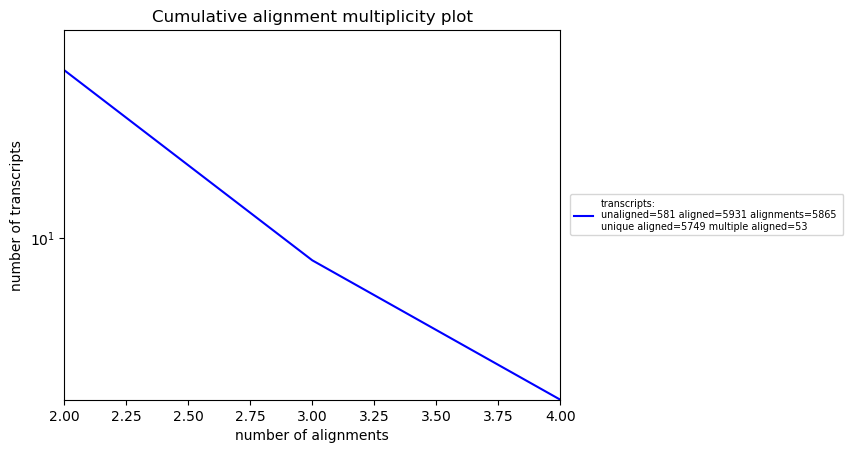

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/alignment_multiplicity.png")

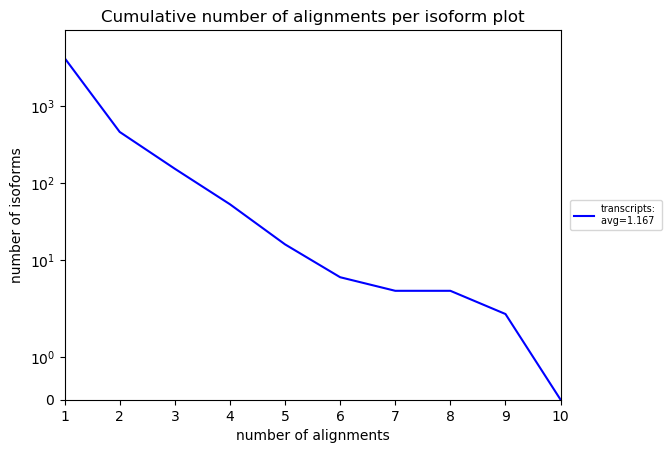

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/alignments_per_isoform.png")

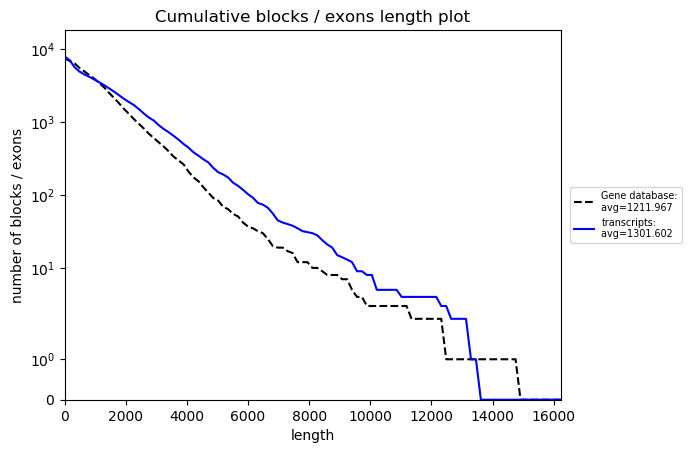

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/block_length.png")

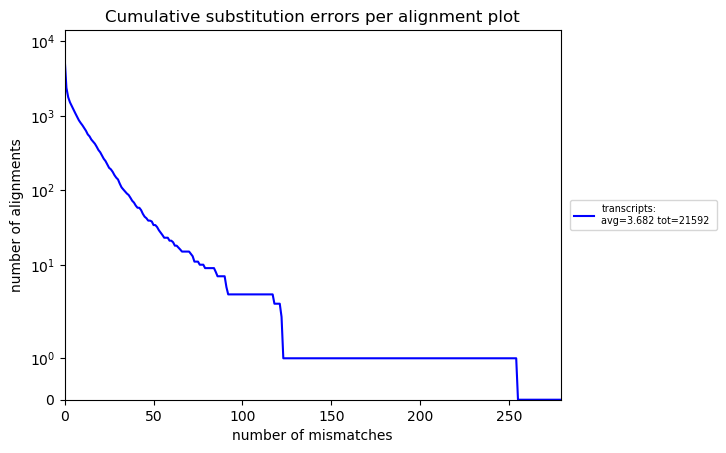

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/mismatch_rate.png")

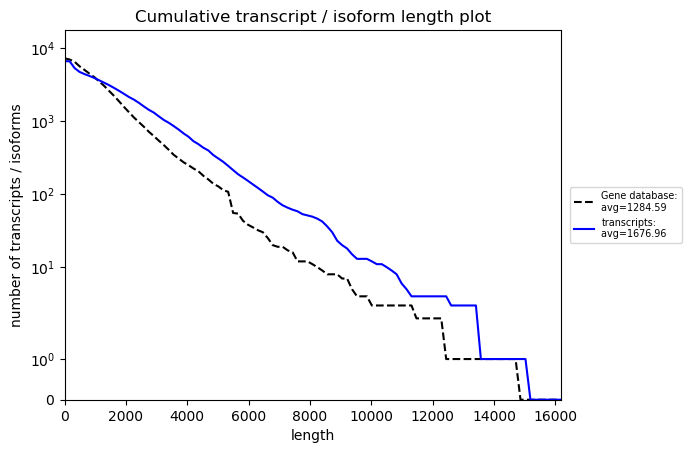

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/transcript_length.png")

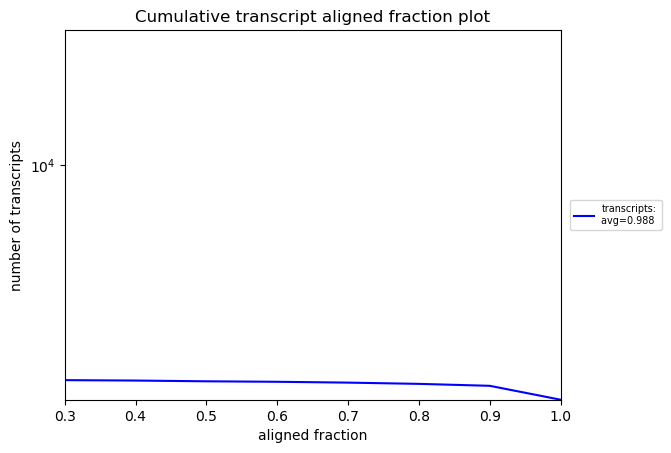

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-aligned.png")

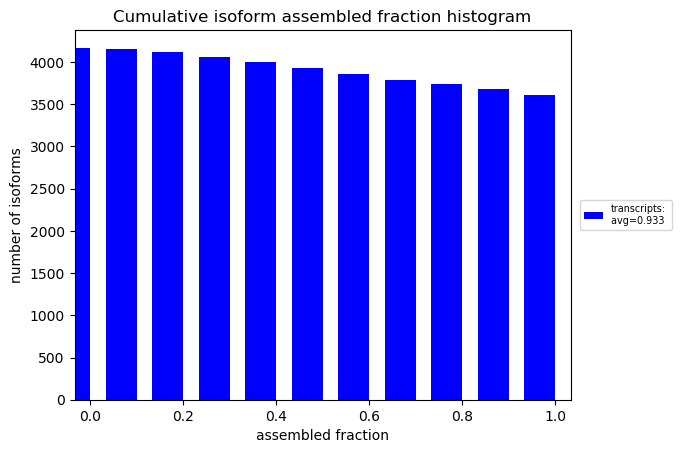

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-assembled.png")

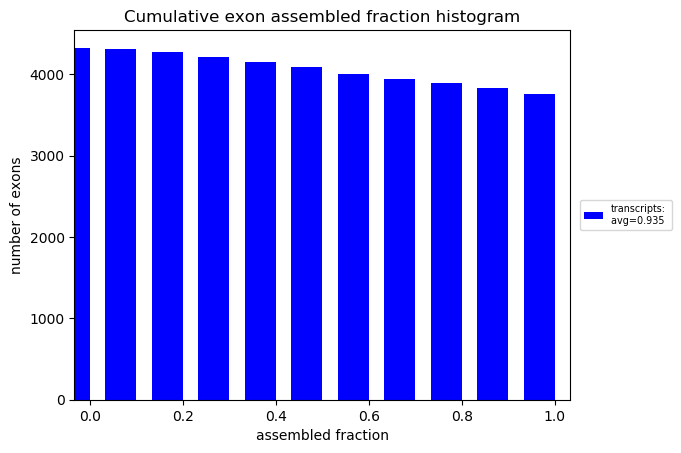

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-assembled_exons.png")

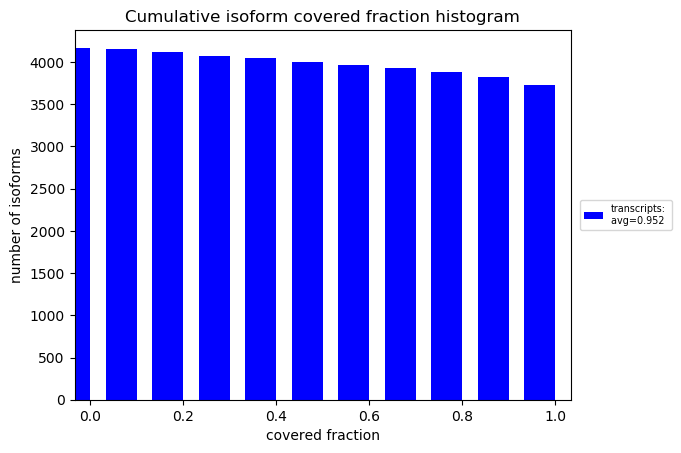

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-covered.png")

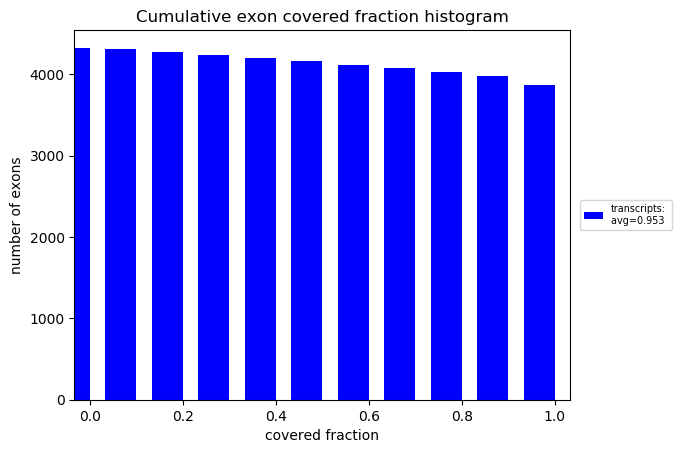

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-covered_exons.png")

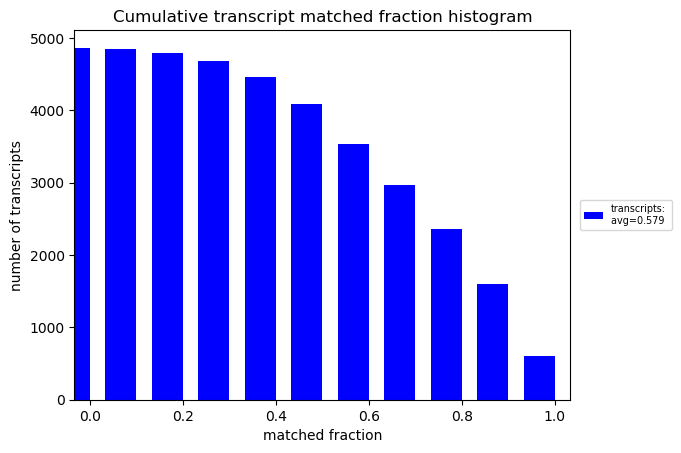

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-matched.png")

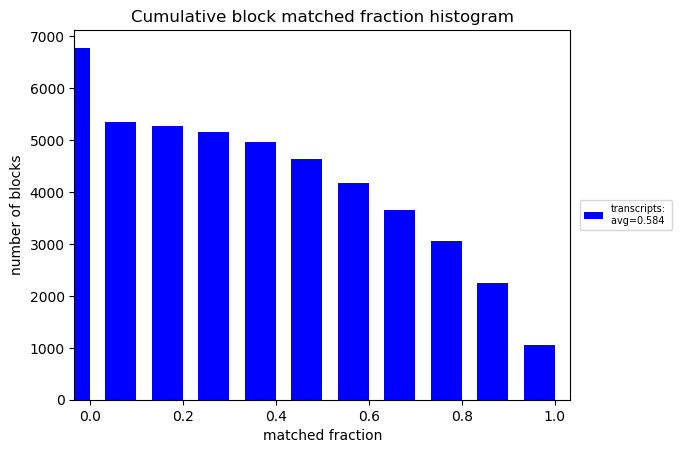

In [ ]:
Image("/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/transcripts_output/x-matched_blocks.png")

In [ ]:
import shutil
shutil.make_archive('rnaquast', 'zip', '/content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28')
!cp rnaquast.zip "drive/My Drive/hw7"

In [ ]:
!cp /content/rnaQUAST-2.2.2/rnaQUAST_results/results_2022_04_28_17_27_28/short_report.txt "drive/My Drive/hw7"

### **Сравнение результатов**

In [ ]:
!cat //content/transcripts_output/sensitivity.txt

METRICS/TRANSCRIPTS                                    transcripts              
 == ASSEMBLY COMPLETENESS (SENSITIVITY) == 
Database coverage                                      0.732                    
Duplication ratio                                      1.028                    
Avg. number of transcripts mapped to one isoform       1.167                    

50%-assembled genes                                    3886                     
95%-assembled genes                                    3606                     
50%-covered genes                                      3975                     
95%-covered genes                                      3722                     

50%-assembled isoforms                                 3886                     
95%-assembled isoforms                                 3606                     
50%-covered isoforms                                   3975                     
95%-covered isoforms                                   3722    

In [ ]:
count = 0
for i in range(len(covs)):
    tpkm = TPKM[i]
    p = pp[i]
    cov = covs[i]
    for j in range(len(p)): 
        if len(np.where(cov[p[j][0]:p[j][1]+1] > 0)[0]) / (p[j][1] - p[j][0] + 1) >= 0.95 and tpkm[j] > 0.009:
          count += 1
print(f'Количество генов с покрытием 95% и TPKM > 0.009 равно {count}')

Количество генов с покрытием 95% и TPKM > 0.009 равно 3758


Как видим, результаты, полученные с помощью выравнивания и последующего подсчета покрытия и TPKM для генов,  и результаты, полученные с помощью сборки, похожи

- 95%-assembled exons                                    3761
- Количество генов с покрытием 95% и TPKM > 0.009 равно 3758